In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Sample data
data = {
    'X1': [2, 3, 5, 7, 9, 6, 4, 8, 1, 0],
    'X2': [1, 4, 7, 2, 8, 3, 5, 0, 6, 9],
    'Y': [0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
}

In [ ]:
# Creating a DataFrame
df = pd.DataFrame(data)

# Splitting the data into features and target variable
X = df[['X1', 'X2']]
y = df['Y']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Logistic Regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

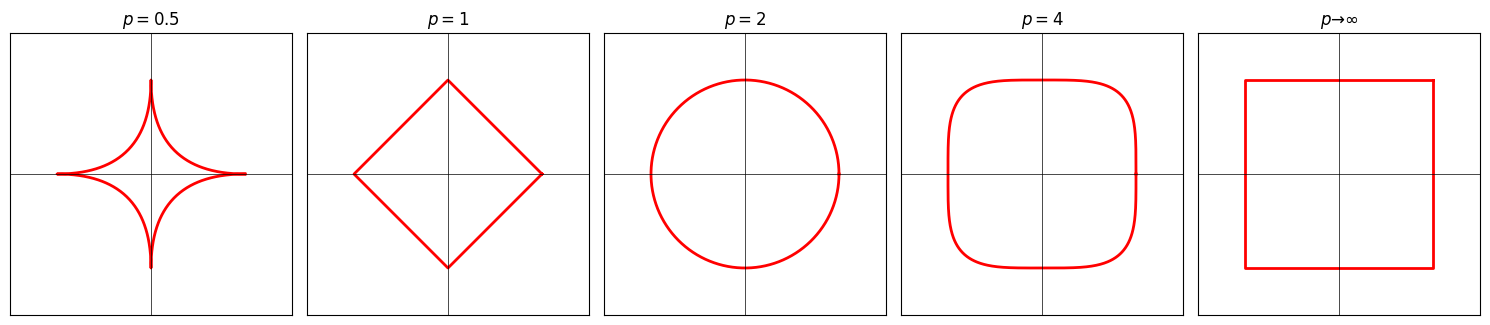

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define p values for different norms
p_values = [0.5, 1, 2, 4, 100]
labels = [r'$p=0.5$', r'$p=1$', r'$p=2$', r'$p=4$', r'$p \to \infty$']

fig, axes = plt.subplots(1, len(p_values), figsize=(15, 4))

theta = np.linspace(0, 2 * np.pi, 1000)

for ax, p, label in zip(axes, p_values, labels):
    if p == 100:  # Approximate p = infinity
        x = np.array([1, -1, -1, 1, 1])
        y = np.array([1, 1, -1, -1, 1])
    else:
        x = np.sign(np.cos(theta)) * np.abs(np.cos(theta))**(2/p)
        y = np.sign(np.sin(theta)) * np.abs(np.sin(theta))**(2/p)
    
    ax.plot(x, y, 'r', linewidth=2)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')

plt.tight_layout()
# plt.savefig("lp_norm_unit_balls.pdf")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style
sns.set(style="whitegrid")

# Step 1: Choose a distribution 
# You can try different distributions
size = 10000
# original_distribution = np.random.exponential(1.0, size)
original_distribution = np.random.uniform(0, 1, size)
# original_distribution = np.random.binomial(10, 0.5, size)

# Step 2 & 3: Generate samples and calculate their means
sample_sizes = [1, 5, 10, 2000]  # Different sample sizes
mean_of_samples = {sample_size: [np.mean(np.random.choice(original_distribution, sample_size))
                                  for _ in range(1000)] for sample_size in sample_sizes}

# Step 4: Plot the distribution of these sample means
plt.figure(figsize=(10, 8))
for i, sample_size in enumerate(sample_sizes, 1):
    plt.subplot(2, 2, i)
    sns.histplot(mean_of_samples[sample_size], kde=True, color='skyblue', bins=30)
    plt.title(f'Sample Size: {sample_size}', fontsize=16)
    plt.xlabel('Sample Mean', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()

plt.savefig('pictures/central_limit_theorem.pdf')

plt.show()
